# Quickstart to generate  Waveforms with FEW in Time and Frequency Domain

In this tutorial, we demonstrate how to use the Fast EMRI Waveform package to produce waveforms in the time domain (TD) and in the frequency domain (FD).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from few.waveform import GenerateEMRIWaveform

# Initialize waveform generators
# frequency domain
fd_gen = GenerateEMRIWaveform("FastKerrEccentricEquatorialFlux",sum_kwargs=dict(pad_output=True, output_type="fd", odd_len=True),return_list=True)

# time domain
td_gen = GenerateEMRIWaveform("FastKerrEccentricEquatorialFlux",sum_kwargs=dict(pad_output=True, odd_len=True),return_list=True)

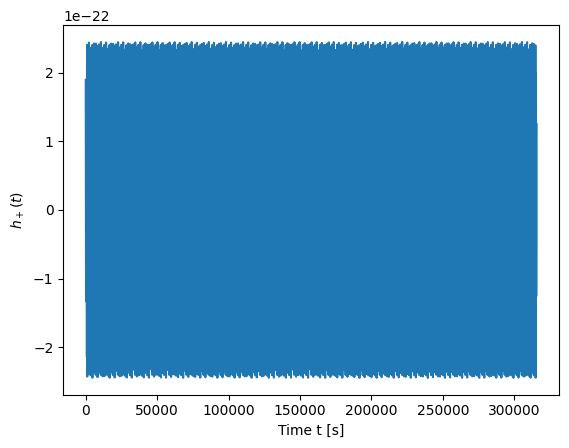

/Users/c.chapman-bird@bham.ac.uk/miniconda3/envs/few2.0rc1/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/c.chapman-bird@bham.ac.uk/miniconda3/envs/few2.0rc1/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


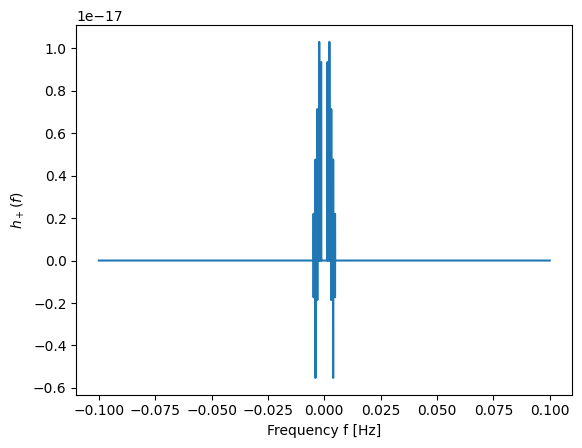

In [2]:
# define the intrinsic parameters
m1 = 1e6  # central object mass in solar masses
a = 0.9  # dimensionless spin parameter of the central object
m2 = 10.0  # secondary object mass in solar masses
p0 = 8.5  # initial semi-latus rectum
e0 = 0.3  # eccentricity
x0 = 1.0  # will be ignored in Schwarzschild waveform
# initial phases
Phi_phi0 = np.pi / 3
Phi_theta0 = 0.0
Phi_r0 = np.pi / 3
# define the extrinsic parameters
qK = np.pi / 3  # polar spin angle
phiK = np.pi / 3  # azimuthal viewing angle
qS = np.pi / 3  # polar sky angle
phiS = np.pi / 3  # azimuthal viewing angle
dist = 1.0  # distance in Gpc

Tobs = 0.01  # observation time, if the inspiral is shorter, the it will be zero padded
dt = 5.0  # time interval
eps = 1e-2  # mode content percentage

waveform_kwargs = {"T": Tobs,"dt": dt,"mode_selection_threshold": eps}

parameters = [m1, m2, a, p0, e0, x0, dist, qS, phiS, qK, phiK, Phi_phi0, Phi_theta0, Phi_r0]

# create TD signal
waveform_td = td_gen(*parameters, **waveform_kwargs)
time_array = np.arange(len(waveform_td[0])) * dt
# plot the waveform
plt.figure()
plt.plot(time_array, waveform_td[0])
plt.xlabel("Time t [s]")
plt.ylabel("$h_+ (t)$")
plt.show()

# # create FD waveform
waveform_fd = fd_gen(*parameters, **waveform_kwargs)
frequency_array = fd_gen.waveform_generator.create_waveform.frequency
plt.figure()
plt.plot(frequency_array, waveform_fd[0])
plt.xlabel("Frequency f [Hz]")
plt.ylabel("$h_+ (f)$")
plt.show()